<h3> Titanic Dataset </h3>

<p style="font-size: 12px"> The Titanic dataset is a famous and widely used dataset in the field of machine learning and data analysis. It contains information about the passengers onboard the RMS Titanic, which famously sank on its maiden voyage in 1912. The dataset is often used for classification tasks and exploring survival patterns among the passengers.The Titanic dataset typically includes the following features: </p>


<ul style="font-size: 12px">
<li> PassengerId: A unique identifier for each passenger. </li>
<li> Survived: Indicates whether the passenger survived (1) or not (0). </li>
<li> Pclass: The passenger class (1, 2, or 3) representing the ticket class. </li>
<li> Name: The name of the passenger.</li>
<li> Sex: The gender of the passenger (male or female).</li>
<li> Age: The age of the passenger in years.</li>
<li> SibSp: The number of siblings or spouses aboard the Titanic.</li>
<li> Parch: The number of parents or children aboard the Titanic.</li>
<li> Ticket: The ticket number.</li>
<li> Fare: The fare paid for the ticket.</li>
<li> Cabin: The cabin number.</li>
<li> Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).</li>
</ul>

1. Import libraries

In [88]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from yellowbrick.features import Rank1D, Rank2D
from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold

2. Import Dataset

In [89]:
df_gs = pd.read_csv("./titanic/gender_submission.csv")
df_train = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")

cat_columns = ['Sex', 'Ticket', 'Cabin', 'Embarked']
df_train[cat_columns] = df_train[cat_columns].apply(lambda x: pd.factorize(x)[0])
df_train = df_train.dropna()

df_train.describe()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,304.852941,34.694514,16.478992,0.257703
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,198.503135,52.918930,36.612144,0.525083
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,132.000000,8.050000,-1.000000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,282.500000,15.741700,-1.000000,0.000000
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,471.750000,33.375000,3.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,680.000000,512.329200,146.000000,2.000000


3. See how variables are distributed

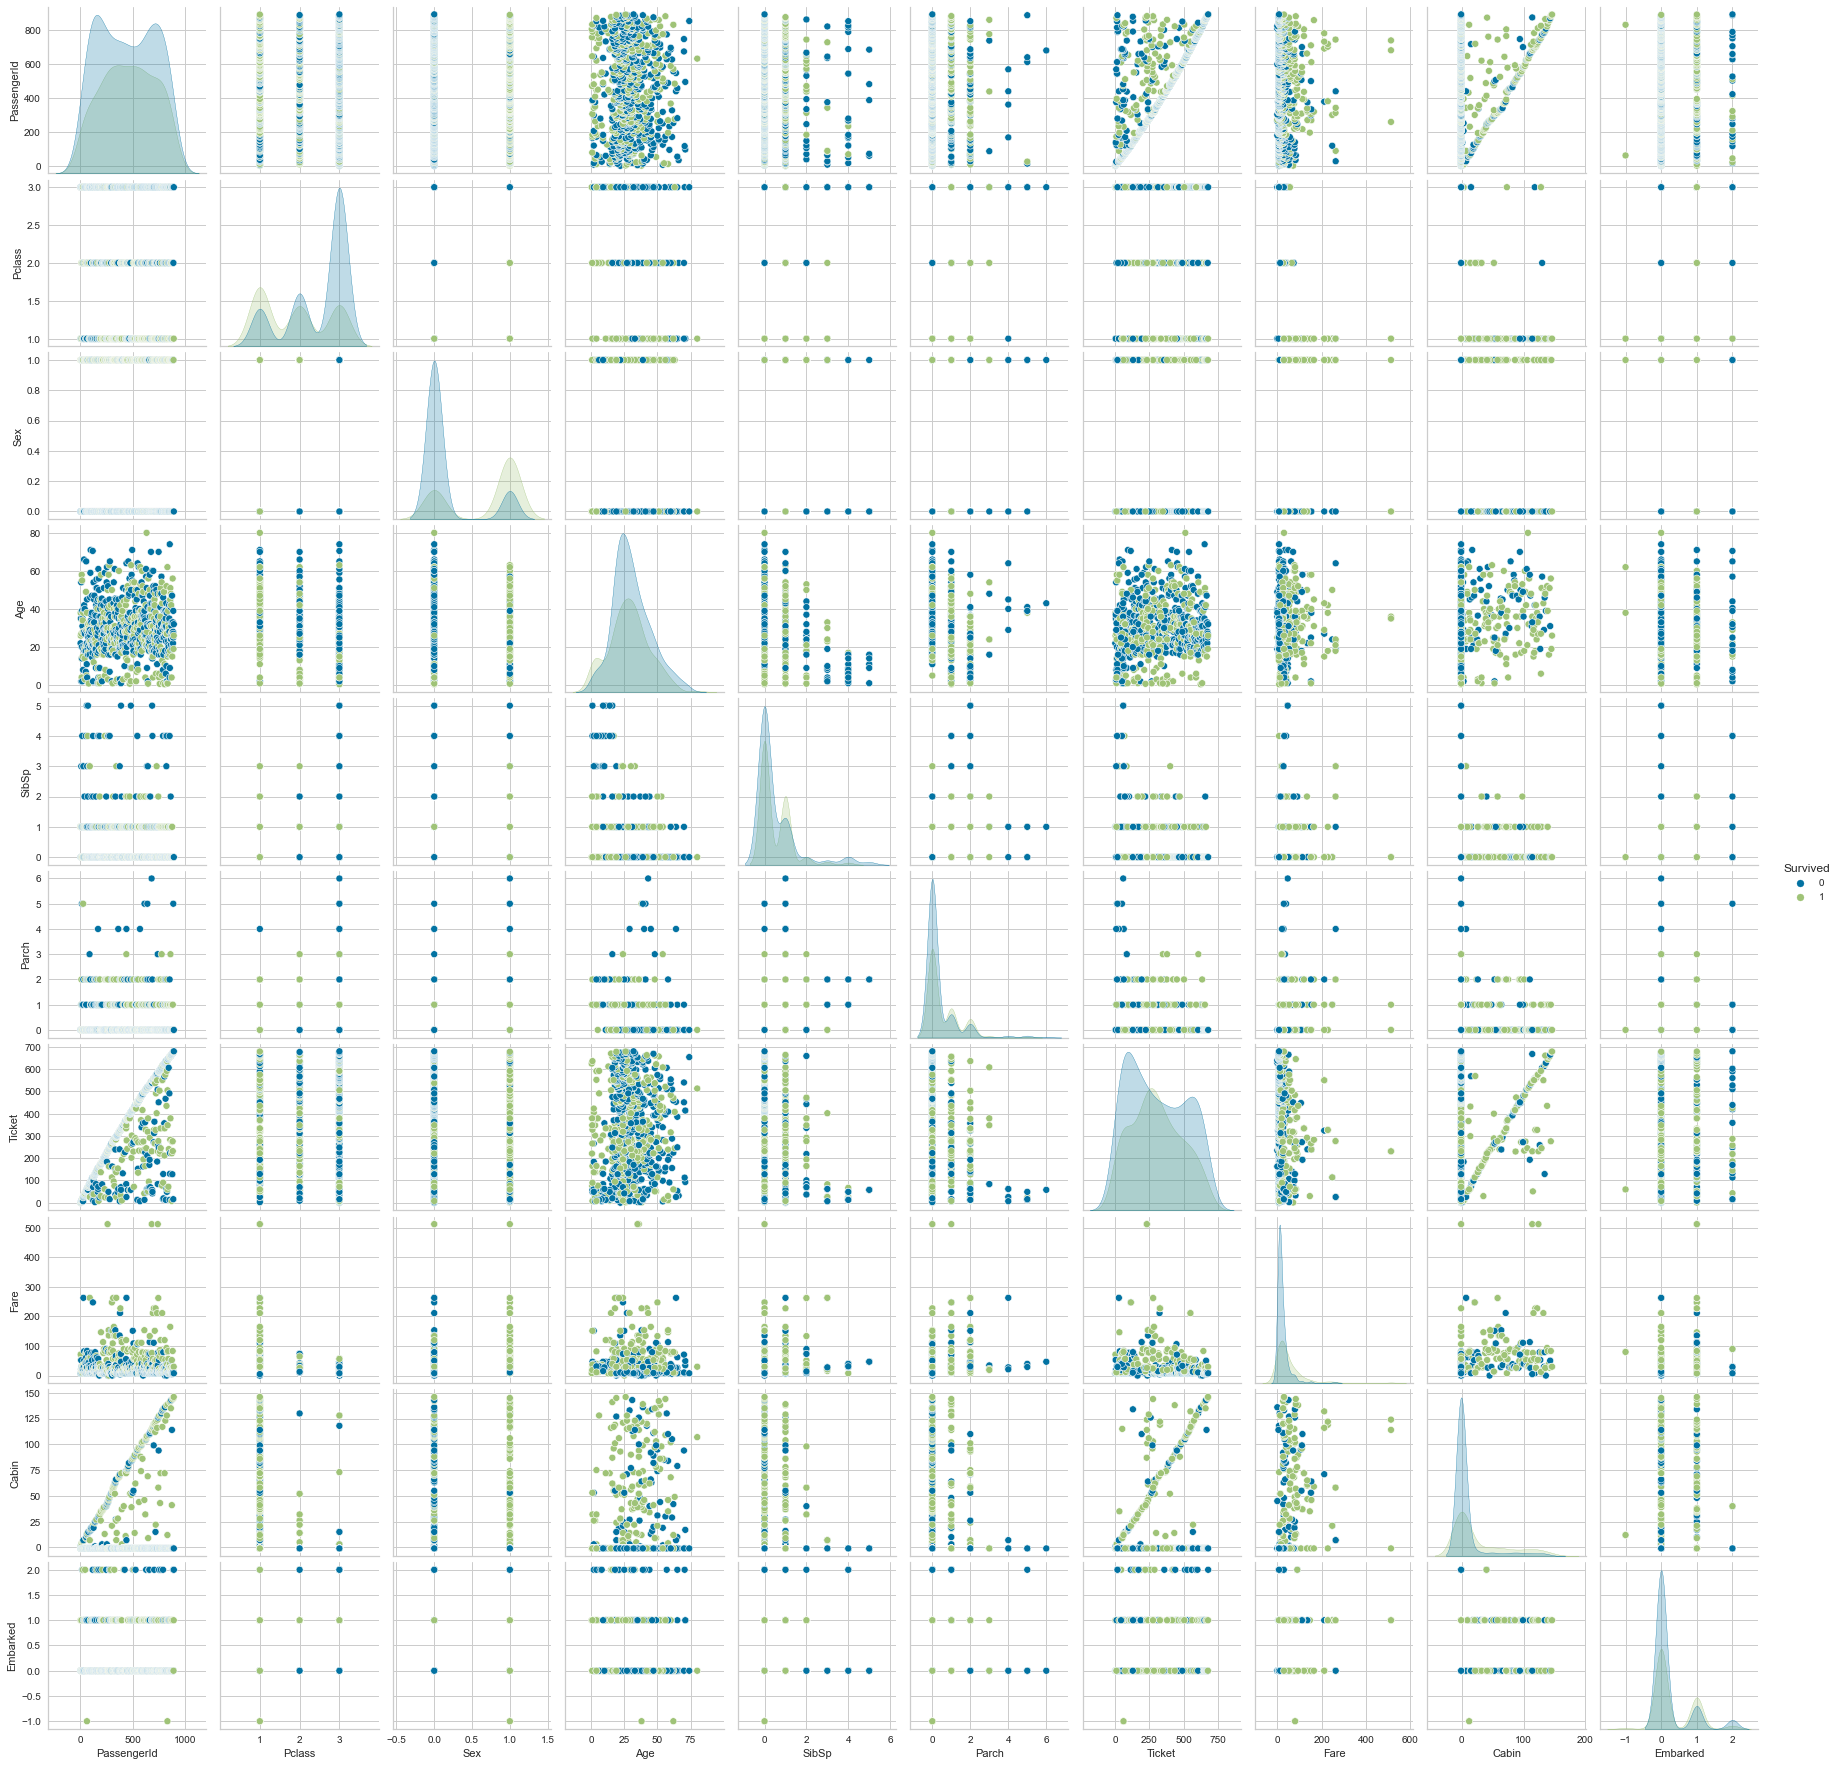

In [81]:
# Let's see how survived passagers are distributed over variables 
sns.pairplot(df_train, hue = "Survived")


3. Show only most important information

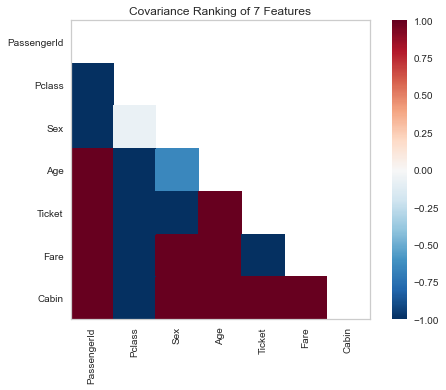

<AxesSubplot:title={'center':'Covariance Ranking of 7 Features'}>

In [90]:
# Try to remove this columns to reduce noise 

columns = list(df_train.columns) 
columns.remove('Name')
columns.remove('Survived')
columns.remove('SibSp')
columns.remove('Embarked')
columns.remove('Parch')


X = df_train[columns]               # Define input 
Y = df_train['Survived']            # Define output 




visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, Y)           
visualizer.transform(X)        
visualizer.show()              



4. See PCA to check data pattern 

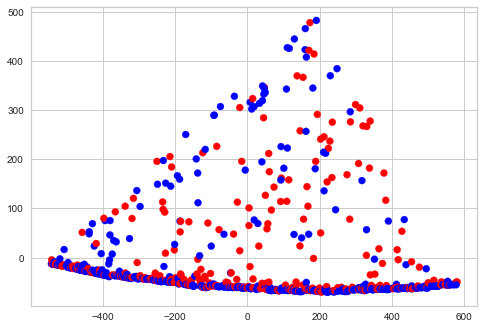

In [91]:
pca = PCA().fit_transform(X)
Yn =["blue" if i== 0 else "red" for i in Y ]

fig, axes = plt.subplots()
scatter = axes.scatter(pca[:,0], pca[:,1], c = Yn)
plt.show()

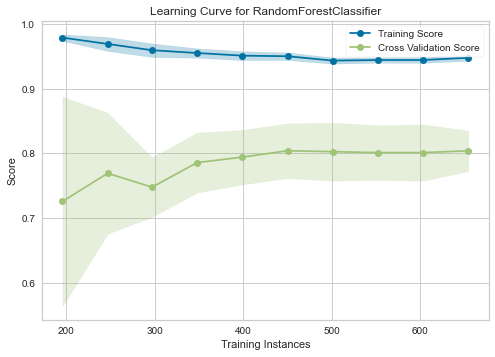

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [92]:
rf = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=2)
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    rf, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y)       
visualizer.show()


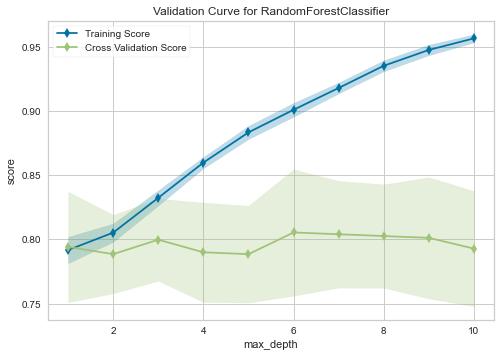

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [ ]:
rf = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=2)

viz = ValidationCurve(
    RandomForestClassifier(criterion='entropy'), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="accuracy"
)

viz.fit(X, Y)
viz.show()

In [93]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)



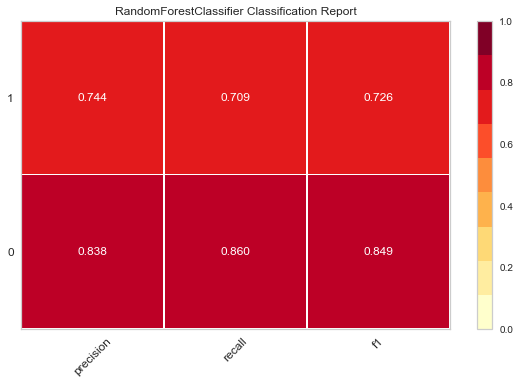

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [94]:
visualizer = ClassificationReport(rf)

visualizer.fit(Xtrain, Ytrain)
visualizer.score(Xtest, Ytest)
visualizer.show()